* Extracting our dataset

In [ ]:
import tarfile

In [ ]:
tar = tarfile.open("/content/drive/MyDrive/aclImdb_v1.tar.gz", "r:gz")
tar.extractall(path="/content")
tar.close()

In [ ]:
import os
from scipy import sparse
import json
import numpy as np
import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords , wordnet
from nltk.stem import PorterStemmer , WordNetLemmatizer

In [ ]:
def load_data( path , lst_x , lst_y ):
  for filename in os.listdir(path + "/pos" ):
      file = open( path + "/pos/" + filename , "r" )
      lst_x.append(file.read())
      lst_y.append(1)
  for filename in os.listdir(path+"/neg"):
    file = open( path + "/neg/" + filename , "r" )
    lst_x.append(file.read())
    lst_y.append(0)

In [ ]:
train_data_x =[]
train_data_y = []
test_data_x =[]
test_data_y = []
load_data( "/content/aclImdb/train" , train_data_x , train_data_y )
load_data( "/content/aclImdb/test" , test_data_x , test_data_y )

In [ ]:
train_data_x , valid_data_x , train_data_y , valid_data_y = train_test_split( train_data_x , train_data_y , test_size = 0.1 ,
                                                                             stratify = train_data_y)

In [ ]:
train_data_y = np.array( train_data_y )
train_data_y.reshape(22500,1)

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
test_data_y = np.array( test_data_y )
test_data_y.reshape(25000,1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
valid_data_y = np.array( valid_data_y )
valid_data_y.reshape(2500,1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def tokenize_func ( lst ):
  counter = 0 
  for sent in lst:
    words = word_tokenize(sent)
    lst[counter] = words
    counter = counter + 1

In [ ]:
tokenize_func(train_data_x)
tokenize_func(test_data_x)
tokenize_func(valid_data_x)

In [ ]:
def remove_stop_words(lst , stop_words ):
  counter = 0
  for x in lst:
    new_list = [ w for w in x if w not in stop_words ]
    lst[counter] = new_list
    counter = counter + 1 

In [ ]:
stop_words = set(stopwords.words("english"))
remove_stop_words(train_data_x,stop_words)
remove_stop_words(test_data_x,stop_words)
remove_stop_words(valid_data_x , stop_words)

In [ ]:
def lemmatization_with_pos( lst ):
  lemmatizer = WordNetLemmatizer()
  tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}
  for i in range( len(lst) ):
    tagged_words = nltk.pos_tag( lst[i] )
    for j in range( len( tagged_words ) ):
      if( tagged_words[j][1][0] in tag_dict ):
        lst[i][j] = lemmatizer.lemmatize( tagged_words[j][0] , pos = tag_dict[tagged_words[j][1][0]] )

In [ ]:
lemmatization_with_pos(train_data_x)
lemmatization_with_pos( test_data_x )
lemmatization_with_pos( valid_data_x )

In [ ]:
length = [ len(w) for w in train_data_x ]
x = {"length" : length }
df = pd.DataFrame(x)

In [ ]:
df.describe()

,length
count,22500.000000
mean,182.072711
std,136.612947
min,8.000000
25%,96.000000
50%,135.000000
75%,223.000000
max,1848.000000


In [ ]:
def listTostring(data):
  count = 0
  new_list = list()
  for l in data:
    new_list.append(' '.join(map(str, l)))
    count += 1
  return new_list

In [ ]:
cv = CountVectorizer()

In [ ]:
train_data_x_non_tokenized = listTostring(train_data_x)    # non-tokenized training examples

In [ ]:
data_matrix_cv = cv.fit_transform(train_data_x_non_tokenized)    # 25000 * 68869 numpy.int64 matrix
data_matrix_cv

<22500x65741 sparse matrix of type '<class 'numpy.int64'>'
	with 2305995 stored elements in Compressed Sparse Row format>

In [ ]:
tfv = TfidfVectorizer()

In [ ]:
data_matrix_TFV = tfv.fit_transform( train_data_x_non_tokenized )
data_matrix_TFV

<22500x65741 sparse matrix of type '<class 'numpy.float64'>'
	with 2305995 stored elements in Compressed Sparse Row format>

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-12-19 18:29:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-19 18:29:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-19 18:29:14--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
def create_embedding_data_matrix ( train_data_x_tokenized , max_num_of_words , vector_size , embeddings_index ):
  data_matrix = np.zeros( ( len(train_data_x_tokenized) , max_num_of_words * vector_size ) )
  for i in range (len(train_data_x_tokenized)):
    for j in range( len( train_data_x_tokenized[i] ) ):
      if j == max_num_of_words :
        break
      elif  train_data_x_tokenized[i][j] in embeddings_index :
        data_matrix[ i , j * vector_size : j * vector_size + vector_size   ] =  embeddings_index[train_data_x_tokenized[i][j]]
  return data_matrix

In [ ]:
data_matrix_word_embedding = create_embedding_data_matrix( train_data_x , 120 , 100 , embeddings_index )

In [ ]:
data_matrix_word_embedding.shape

(22500, 12000)

In [ ]:
valid_data_x_embedding = create_embedding_data_matrix( valid_data_x , 120 , 100 , embeddings_index )
test_data_x_embedding = create_embedding_data_matrix( test_data_x , 120 , 100 , embeddings_index )

In [ ]:
test_data_x_non_tokenized = listTostring( test_data_x )
valid_data_x_non_tokenized = listTostring(valid_data_x)
valid_data_x_cv = cv.transform(valid_data_x_non_tokenized)
test_data_x_cv = cv.transform( test_data_x_non_tokenized )
valid_data_x_tfv = tfv.transform(valid_data_x_non_tokenized)
test_data_x_tfv = tfv.transform( test_data_x_non_tokenized )

In [ ]:
valid_scores_cv = {}
valid_scores_tfv = {}
valid_scores_embedding = {}
test_scores_cv = {}
test_scores_tfv = {}
test_scores_embedding = {}

In [ ]:
with open( '/content/valid_scores_cv.json ' , 'w') as file:
  json.dump( valid_scores_cv , file )
with open( '/content/test_scores_cv.json ' , 'w') as file:
  json.dump( test_scores_cv , file )

In [ ]:
with open( '/content/valid_scores_tfv.json ' , 'w') as file:
  json.dump( valid_scores_tfv , file )
with open( '/content/test_scores_tfv.json ' , 'w') as file:
  json.dump( test_scores_tfv , file )

In [ ]:
with open( '/content/valid_scores_embedding.json ' , 'w') as file:
  json.dump( valid_scores_embedding , file )
with open( '/content/test_scores_embedding.json ' , 'w') as file:
  json.dump( test_scores_embedding , file )

**using logistic regression for count vectorizer**

In [ ]:
logistic_regression_model_cv = LogisticRegression( max_iter = 300 )

In [ ]:
logistic_regression_model_cv.fit( data_matrix_cv , train_data_y )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=300)

In [ ]:
predictions = logistic_regression_model_cv.predict( valid_data_x_cv )
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8816


In [ ]:
valid_scores_cv['logistic_regression'] = accuracy_score(valid_data_y,predictions)

In [ ]:
predictions = logistic_regression_model_cv.predict( test_data_x_cv )
print(predictions)

[1. 1. 1. ... 0. 0. 0.]


In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.85668


In [ ]:
test_scores_cv['logistic_regression'] = accuracy_score(test_data_y,predictions)

**Using logistic regression for tf_idf vectorizer**

In [ ]:
logistic_regression_model_tfv = LogisticRegression(max_iter= 300 )

In [ ]:
logistic_regression_model_tfv.fit( data_matrix_TFV , train_data_y )

LogisticRegression(max_iter=300)

In [ ]:
predictions = logistic_regression_model_tfv.predict( valid_data_x_tfv )
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8872


In [ ]:
valid_scores_tfv['logistic_regression'] = accuracy_score(valid_data_y,predictions)

In [ ]:
predictions = logistic_regression_model_tfv.predict( test_data_x_tfv )
print(predictions)

[1. 1. 1. ... 0. 0. 0.]


In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.8768


In [ ]:
test_scores_tfv['logistic_regression'] = accuracy_score(test_data_y,predictions)

**Using logistic regression for embedding**

In [ ]:
logistic_regression_model_embedding = LogisticRegression( max_iter = 600 )

In [ ]:
logistic_regression_model_embedding.fit( data_matrix_word_embedding , train_data_y )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=600)

In [ ]:
predictions = logistic_regression_model_embedding.predict( valid_data_x_embedding )
print(predictions)

[1 0 0 ... 0 0 0]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6612


In [ ]:
valid_scores_embedding['logistic_regression'] = accuracy_score(valid_data_y,predictions)

In [ ]:
predictions = logistic_regression_model_embedding.predict( test_data_x_embedding )
print(predictions)

[1 1 1 ... 0 1 0]


In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.66824


In [ ]:
test_scores_embedding['logistic_regression'] = accuracy_score(test_data_y,predictions)

**------------------Using KNN for count vectorize--------------------**

------------- KNN_5 ---------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=5 , weights="uniform")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier()

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 1. ... 1. 0. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6244


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=5 , weights='distance')
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 1. ... 1. 0. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6264


-------------- KNN_11--------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=11 , weights="uniform")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 1. ... 0. 0. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.638


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=11 , weights="distance")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 1. ... 0. 0. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.64


----------- KNN_17 ------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=17 , weights="uniform")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 0. ... 1. 0. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6452


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=17 , weights="distance")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=17, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 0. ... 1. 0. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6488


------------ KNN_39   ----------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=39 , weights="uniform")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=39)

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 1. ... 0. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6696


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=39 , weights="distance")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=39, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[0. 0. 1. ... 0. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6732


-----------KNN_49 higest accuracy -------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=49 , weights="uniform")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=49)

In [ ]:

predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[1. 1. 1. ... 0. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6688


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=49 , weights="distance")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=49, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_cv)
print(predictions)

[1. 0. 1. ... 0. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.6736


In [ ]:
valid_scores_cv['KNN'] = accuracy_score(valid_data_y,predictions)

---------- test data----------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=39 , weights="uniform")
KNN.fit(data_matrix_cv , train_data_y)

KNeighborsClassifier(n_neighbors=39)

In [ ]:
predictions = KNN.predict(test_data_x_cv)
print(predictions)

[1. 1. 1. ... 0. 1. 0.]


In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.66372


In [ ]:
test_scores_cv['KNN'] = accuracy_score(test_data_y,predictions)

**------------------Using KNN for tf_idf vectorize--------------------**

--------KNN_5------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=5 , weights="uniform")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier()

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7816


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=5 , weights="distance")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7852


----------------KNN_11---------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=11 , weights="uniform")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7824


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=11 , weights="distance")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7856


----------KNN_20 highest accuracy------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=20 , weights="uniform")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7888


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=20 , weights="distance")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8024


In [ ]:
valid_scores_tfv['KNN'] = accuracy_score( valid_data_y , predictions )

----------KNN_25------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=25 , weights="uniform")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7908


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=25 , weights="distance")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 0. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7948


------------KNN_39---------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=39 , weights="uniform")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=39)

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 1. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.784


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=39 , weights="distance")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=39, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_tfv)
print(predictions)

[1. 1. 1. ... 1. 1. 0.]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7884


---------test data---------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=20 , weights="distance")
KNN.fit(data_matrix_TFV, train_data_y)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [ ]:
predictions = KNN.predict(test_data_x_tfv)
print(predictions)

[1. 1. 1. ... 0. 0. 0.]


In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.69516


In [ ]:
test_scores_tfv['KNN'] = accuracy_score( test_data_y , predictions )

**---------- Using KNN for embedding --------------**

--------------------KNN_5  highest accuracy---------------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=5 , weights="uniform")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier()

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5148


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=5 , weights="distance")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.518


---------------------- KNN_11 -----------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=11 , weights="uniform")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5148


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=11 , weights="distance")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5188


In [ ]:
valid_scores_embedding['KNN'] = accuracy_score( valid_data_y , predictions )

----------------------- KNN_20 ---------------------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=20 , weights="uniform")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5104


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=20 , weights="distance")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5164


------------------- KNN_27 ----------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=27 , weights="uniform")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5072


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=27 , weights="distance")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=27, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5116


-------------------- KNN_35 ---------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=35 , weights="uniform")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=35)

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5136


In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=35 , weights="distance")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(n_neighbors=35, weights='distance')

In [ ]:
predictions = KNN.predict(valid_data_x_embedding)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5176


------------------- test data ---------------

In [ ]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=11 , weights="distance")
KNN.fit(data_matrix_word_embedding, train_data_y)

KNeighborsClassifier(weights='distance')

In [ ]:
predictions = KNN.predict(test_data_x_embedding)
print(predictions)

[1 1 1 ... 0 1 1]


In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.51416


In [ ]:
test_scores_embedding['KNN'] = accuracy_score( test_data_y , predictions )

**--------------------- Using Naive Bayes for Count vectorizer ----------------**

----------------- Using BernoulliNB --------------

In [ ]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(data_matrix_cv , train_data_y)

BernoulliNB(binarize=True)

In [ ]:
predictions = BernNB.predict(valid_data_x_cv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7468


In [ ]:
BernNB = BernoulliNB(binarize=.1)
BernNB.fit(data_matrix_cv , train_data_y)

BernoulliNB(binarize=0.1)

In [ ]:
predictions = BernNB.predict(valid_data_x_cv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.846


In [ ]:
BernNB = BernoulliNB( alpha=.1 ,binarize=.1)
BernNB.fit(data_matrix_cv , train_data_y)

BernoulliNB(alpha=0.1, binarize=0.1)

In [ ]:
predictions = BernNB.predict(valid_data_x_cv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8456


------------------ Using MultinomialNB highest accuracy -----------------



In [ ]:
MultiNB = MultinomialNB()
MultiNB.fit(data_matrix_cv , train_data_y)

MultinomialNB()

In [ ]:
predictions = MultiNB.predict(valid_data_x_cv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8592


In [ ]:
valid_scores_cv['NB'] = accuracy_score(valid_data_y,predictions)

------------------ test data ----------------

In [ ]:
predictions = MultiNB.predict(test_data_x_cv)

In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.8166


In [ ]:
test_scores_cv['NB'] = accuracy_score(test_data_y,predictions)

**--------------------- Using Naive Bayes for tf_idf vectorizer ----------------**

----------------- Using BernoulliNB --------------

In [ ]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(data_matrix_TFV , train_data_y)

BernoulliNB(binarize=True)

In [ ]:
predictions = BernNB.predict(valid_data_x_tfv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5


In [ ]:
BernNB = BernoulliNB(binarize=.1)
BernNB.fit(data_matrix_TFV , train_data_y)

BernoulliNB(binarize=0.1)

In [ ]:
predictions = BernNB.predict(valid_data_x_tfv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8284


In [ ]:
BernNB = BernoulliNB(alpha=.1)
BernNB.fit(data_matrix_TFV , train_data_y)

BernoulliNB(alpha=0.1)

In [ ]:
predictions = BernNB.predict(valid_data_x_tfv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8456


------------------ Using MultinomialNB highest accuracy -----------------


In [ ]:
MultiNB = MultinomialNB()
MultiNB.fit(data_matrix_TFV , train_data_y)

MultinomialNB()

In [ ]:
predictions = MultiNB.predict(valid_data_x_tfv)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8624


In [ ]:
valid_scores_tfv['NB'] = accuracy_score( valid_data_y , predictions )

------------- test data ----------------

In [ ]:
predictions = MultiNB.predict(test_data_x_tfv)

In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.8258


In [ ]:
test_scores_tfv['NB'] = accuracy_score( test_data_y , predictions )

**--------------------- Using Naive Bayes for embedding ----------------**

----------------- Using BernoulliNB --------------

In [ ]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(data_matrix_word_embedding , train_data_y)

BernoulliNB(binarize=True)

In [ ]:
predictions = BernNB.predict(valid_data_x_embedding)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.588


In [ ]:
valid_scores_embedding['NB'] = accuracy_score( valid_data_y , predictions )

In [ ]:
BernNB = BernoulliNB(binarize=.1)
BernNB.fit(data_matrix_word_embedding , train_data_y)

BernoulliNB(binarize=0.1)

In [ ]:
predictions = BernNB.predict(valid_data_x_embedding)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.544


In [ ]:
BernNB = BernoulliNB(alpha=.1)
BernNB.fit(data_matrix_word_embedding , train_data_y)

BernoulliNB(alpha=0.1)

In [ ]:
predictions = BernNB.predict(valid_data_x_embedding)

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5416


------------------ test data -----------------


In [ ]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(data_matrix_word_embedding , train_data_y)

BernoulliNB(binarize=True)

In [ ]:
predictions = BernNB.predict(test_data_x_embedding)

In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.57992


In [ ]:
test_scores_embedding['NB'] = accuracy_score( test_data_y , predictions )

**-------------------- Using Random Forests for count vectorizer -----------------**

In [ ]:
RandF = RandomForestClassifier(n_estimators=10)
RandF.fit(data_matrix_cv , train_data_y)

RandomForestClassifier(n_estimators=10)

In [ ]:
predictions = RandF.predict(valid_data_x_cv) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7584


In [ ]:
RandF = RandomForestClassifier(n_estimators=50)
RandF.fit(data_matrix_cv , train_data_y)

RandomForestClassifier(n_estimators=50)

In [ ]:
predictions = RandF.predict(valid_data_x_cv) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8412


In [ ]:
RandF = RandomForestClassifier(n_estimators=90)
RandF.fit(data_matrix_cv , train_data_y)

RandomForestClassifier(n_estimators=90)

In [ ]:
predictions = RandF.predict(valid_data_x_cv) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.85


In [ ]:
valid_scores_cv['RF'] = accuracy_score(valid_data_y,predictions)

--------------------- test data ---------------

In [ ]:
predictions = RandF.predict(test_data_x_cv) 

In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.84504


In [ ]:
test_scores_cv['RF'] = accuracy_score(test_data_y,predictions)

**-------------------- Using Random Forests for tf_idf vectorizer -----------------**

In [ ]:
RandF = RandomForestClassifier(n_estimators=10)
RandF.fit(data_matrix_TFV , train_data_y)

RandomForestClassifier(n_estimators=10)

In [ ]:
predictions = RandF.predict(valid_data_x_tfv) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.7604


In [ ]:
RandF = RandomForestClassifier(n_estimators=30)
RandF.fit(data_matrix_TFV , train_data_y)

RandomForestClassifier(n_estimators=30)

In [ ]:
predictions = RandF.predict(valid_data_x_tfv) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8216


In [ ]:
RandF = RandomForestClassifier(n_estimators=60)
RandF.fit(data_matrix_TFV , train_data_y)

RandomForestClassifier(n_estimators=60)

In [ ]:
predictions = RandF.predict(valid_data_x_tfv) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.8296


In [ ]:
RandF = RandomForestClassifier(n_estimators=80)
RandF.fit(data_matrix_TFV , train_data_y)

RandomForestClassifier(n_estimators=80)

In [ ]:
predictions = RandF.predict(valid_data_x_tfv) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.852


In [ ]:
valid_scores_tfv['RF'] = accuracy_score( valid_data_y , predictions )

-------------------- test data -----------------

In [ ]:
predictions = RandF.predict(test_data_x_tfv) 

In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.83744


In [ ]:
test_scores_tfv['RF'] = accuracy_score( test_data_y , predictions )

**-------------------- Using Random Forests for embedding -----------------**

In [ ]:
RandF = RandomForestClassifier(n_estimators=10)
RandF.fit(data_matrix_word_embedding , train_data_y)

RandomForestClassifier(n_estimators=10)

In [ ]:
predictions = RandF.predict(valid_data_x_embedding) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5368


In [ ]:
RandF = RandomForestClassifier(n_estimators=30)
RandF.fit(data_matrix_word_embedding , train_data_y)

RandomForestClassifier(n_estimators=30)

In [ ]:
predictions = RandF.predict(valid_data_x_embedding) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5536


In [ ]:
RandF = RandomForestClassifier(n_estimators=80)
RandF.fit(data_matrix_word_embedding , train_data_y)

RandomForestClassifier(n_estimators=80)

In [ ]:
predictions = RandF.predict(valid_data_x_embedding) 

In [ ]:
print( accuracy_score( valid_data_y , predictions ) )

0.5884


In [ ]:
valid_scores_embedding['RF'] = accuracy_score( valid_data_y , predictions )

--------------------- test data -------------------

In [ ]:
RandF = RandomForestClassifier(n_estimators=80)
RandF.fit(data_matrix_word_embedding , train_data_y)

RandomForestClassifier(n_estimators=80)

In [ ]:
predictions = RandF.predict(test_data_x_embedding) 

In [ ]:
print( accuracy_score( test_data_y , predictions ) )

0.58912


In [ ]:
test_scores_embedding['RF'] = accuracy_score( test_data_y , predictions )

**------------------------- Using Adaboost for count vectorizer --------------------------**


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=10)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.7208


In [ ]:
adaboost = AdaBoostClassifier(  DecisionTreeClassifier(max_depth=3) ,n_estimators=10)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.7792


In [ ]:
adaboost = AdaBoostClassifier(  DecisionTreeClassifier(max_depth=7) ,n_estimators=10)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                   n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.7856


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(n_estimators=100)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.83


In [ ]:
adaboost = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2) ,n_estimators=100)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8476


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=200)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(n_estimators=200)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.842


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) , n_estimators=200)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=200)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8468


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5) , n_estimators=200)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.7748


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=300)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(n_estimators=300)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8492


In [ ]:
valid_scores_cv['adaboost'] = accuracy_score( valid_data_y , predictions)

In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) ,n_estimators=300)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=300)

In [ ]:
predictions = adaboost.predict(valid_data_x_cv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8448


---------------------------------------------------- test data -----------------------------------------------------------------

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=300)
adaboost.fit(data_matrix_cv , train_data_y)

AdaBoostClassifier(n_estimators=300)

In [ ]:
predictions = adaboost.predict(test_data_x_cv)

In [ ]:
print(accuracy_score( test_data_y , predictions))

0.84876


In [ ]:
test_scores_cv['adaboost'] = accuracy_score( test_data_y , predictions)

**------------------------- Using Adaboost for tf_idf vectorizer --------------------------**


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=10)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.7208


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3) ,n_estimators=10)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.774


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5) ,n_estimators=10)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.786


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(n_estimators=100)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8236


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) , n_estimators=100)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8316


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5) , n_estimators=100)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.7724


In [ ]:
adaboost = AdaBoostClassifier( n_estimators=150)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(n_estimators=150)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8336


------------- Best one ----------

In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) , n_estimators=150)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=150)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.836


In [ ]:
valid_scores_tfv['adaboost'] = accuracy_score( valid_data_y , predictions)

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=200)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(n_estimators=200)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.832


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) , n_estimators=200)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=200)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8336


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) , n_estimators=250)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=250)

In [ ]:
predictions = adaboost.predict(valid_data_x_tfv)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.8336


--------------------- test data ------------------------------------

In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) , n_estimators=150)
adaboost.fit(data_matrix_TFV , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=250)

In [ ]:
predictions = adaboost.predict(test_data_x_tfv)

In [ ]:
print(accuracy_score( test_data_y , predictions))

0.83684


In [ ]:
test_scores_tfv['adaboost'] = accuracy_score( test_data_y , predictions)

**------------------------- Using Adaboost for embedding--------------------------**


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=10)
adaboost.fit(data_matrix_word_embedding , train_data_y)

AdaBoostClassifier(n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_embedding)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.5656


In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2) ,n_estimators=10)
adaboost.fit(data_matrix_word_embedding , train_data_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=10)

In [ ]:
predictions = adaboost.predict(valid_data_x_embedding)

In [ ]:
print(accuracy_score( valid_data_y , predictions))

0.5776


In [ ]:
valid_scores_embedding['adaboost'] = accuracy_score(valid_data_y,predictions)

---------------------------------------- test data ------------------------

In [ ]:
predictions = adaboost.predict(test_data_x_embedding)

In [ ]:
print(accuracy_score( test_data_y , predictions))

0.59156


In [ ]:
test_scores_embedding['adaboost'] = accuracy_score(test_data_y,predictions)

_______________________________________________________________________

-------------------------- plots --------------------------

In [ ]:
f = open("drive/MyDrive/valid_scores_cv.json_")
valid_scores_cv = json.load(f)
f = open("drive/MyDrive/test_scores_cv.json_")
test_scores_cv = json.load(f)
f = open("drive/MyDrive/valid_scores_tfv.json_")
valid_scores_tfv = json.load(f)
f = open("drive/MyDrive/test_scores_tfv.json_")
test_scores_tfv = json.load(f)
f = open("drive/MyDrive/valid_scores_embedding.json_")
valid_scores_embedding = json.load(f)
f = open("drive/MyDrive/test_scores_embedding.json_")
test_scores_embedding = json.load(f)

In [ ]:
def getInfo(dic):
  classifiers = list()
  accuracy = list()
  for key , value in dic.items():
    classifiers.append(key)
    accuracy.append(value)
  return classifiers , accuracy


**-------------------------------------- counter vectorizer ----------------------------------------**

------------------------------ Validation data ----------------------

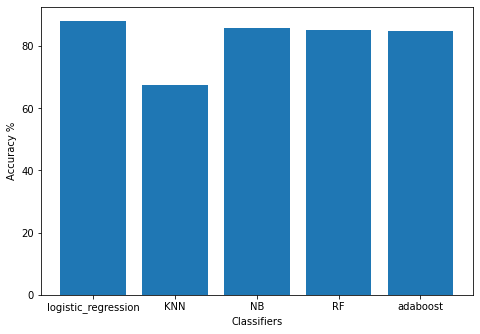

In [ ]:
info = getInfo(valid_scores_cv)
classifiers = info[0]
accuracy = info[1]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(classifiers,accuracy)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifiers')

plt.show()

----------------------------- Test data ------------------------------

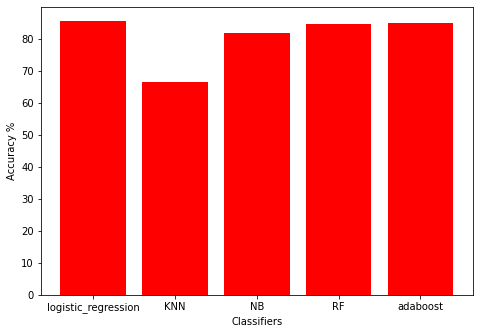

In [ ]:
info = getInfo(test_scores_cv)
classifiers = info[0]
accuracy = info[1]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(classifiers,accuracy ,color = 'r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifiers')

plt.show()

**--------------------------------- TF_IDF Vectorizer ----------------------------------------**

----------------------- validation data ----------------------------------------

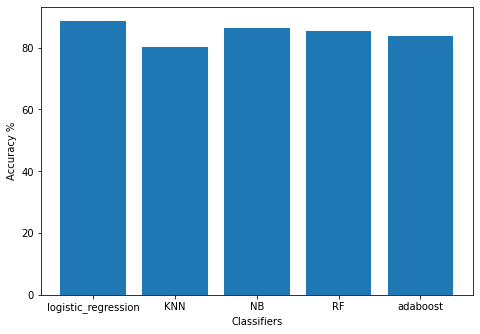

In [ ]:
info = getInfo(valid_scores_tfv)
classifiers = info[0]
accuracy = info[1]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(classifiers,accuracy)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifiers')

plt.show()

--------------------------------- test data ----------------------------------

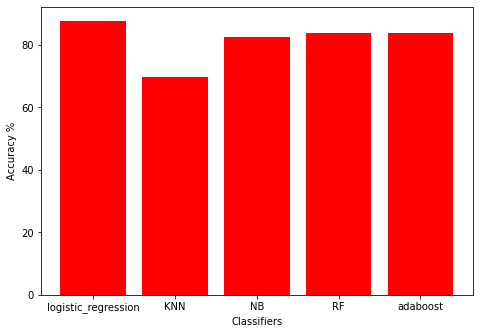

In [ ]:
info = getInfo(test_scores_tfv)
classifiers = info[0]
accuracy = info[1]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(classifiers,accuracy , color='r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifiers')

plt.show()

**-------------------------------- Embedding Word -------------------------------------**

---------------------------- validation data ---------------------------------

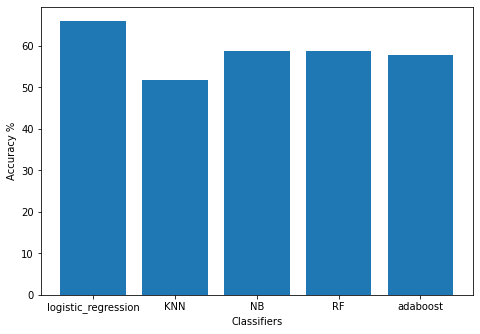

In [ ]:
info = getInfo(valid_scores_embedding)
classifiers = info[0]
accuracy = info[1]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(classifiers,accuracy)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifiers')

plt.show()

--------------------------- test data -----------------------------------

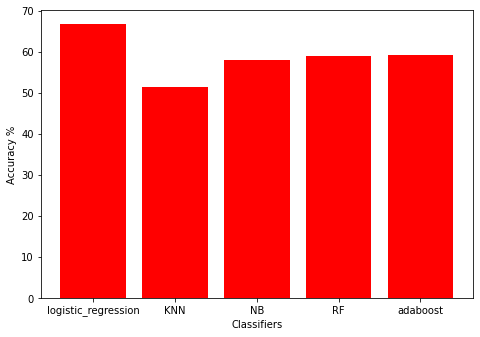

In [ ]:
info = getInfo(test_scores_embedding)
classifiers = info[0]
accuracy = info[1]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(classifiers,accuracy , color='r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifiers')

plt.show()

**--------------------------------------- Classifires -----------------------------**

------------------------- Logistic Regression ----------------------------------

------------------- Validation Data ------------------------------

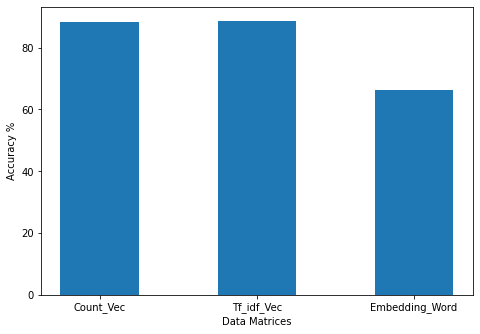

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [valid_scores_cv["logistic_regression"] , valid_scores_tfv["logistic_regression"] , valid_scores_embedding["logistic_regression"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()


-------------------------------- test data --------------------------------------

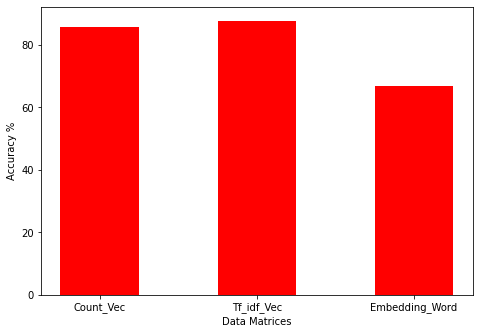

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [test_scores_cv["logistic_regression"] , test_scores_tfv["logistic_regression"] , test_scores_embedding["logistic_regression"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5 , color='r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

**--------------------------------- KNN -------------------------------**

---------------------------------- Validation data -----------------------------

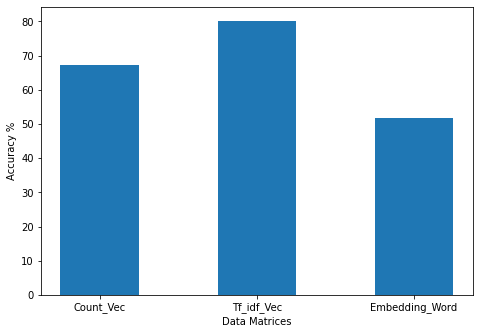

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [valid_scores_cv["KNN"] , valid_scores_tfv["KNN"] , valid_scores_embedding["KNN"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

------------------------------- Test data ----------------------------------------

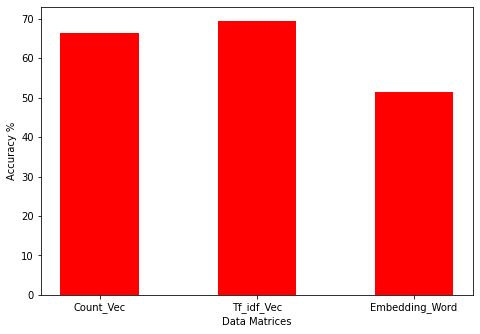

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [test_scores_cv["KNN"] , test_scores_tfv["KNN"] , test_scores_embedding["KNN"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5 , color='r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

**------------------------------------------ Naive Bayes --------------------------------**

----------------------- Validate data -------------------------------

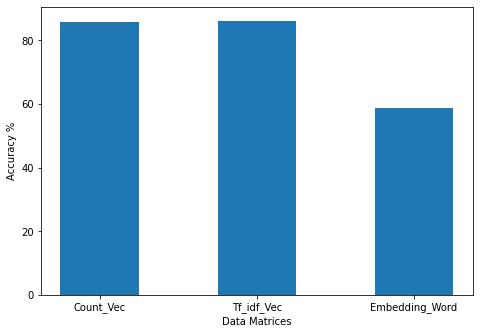

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [valid_scores_cv["NB"] , valid_scores_tfv["NB"] , valid_scores_embedding["NB"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

--------------------------------- Test data --------------------------------------

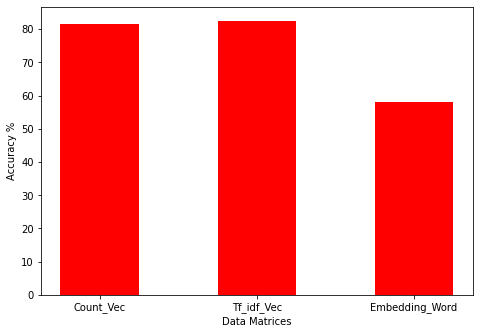

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [test_scores_cv["NB"] , test_scores_tfv["NB"] , test_scores_embedding["NB"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5 , color='r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

**--------------------------------------- Random Forests ------------------------------------**

-------------------------------- Validate data ----------------------------------

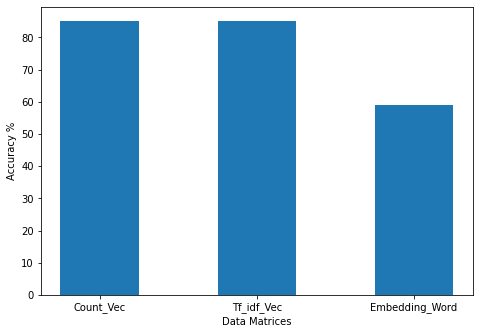

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [valid_scores_cv["RF"] , valid_scores_tfv["RF"] , valid_scores_embedding["RF"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

-------------------------------- Test Data -----------------------------------

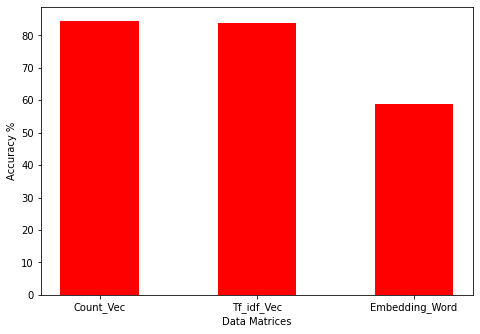

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [test_scores_cv["RF"] , test_scores_tfv["RF"] , test_scores_embedding["RF"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5 , color='r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

**------------------------------------------ Adaboost --------------------------------------**

-----------------------------  Validate data -------------------------------------

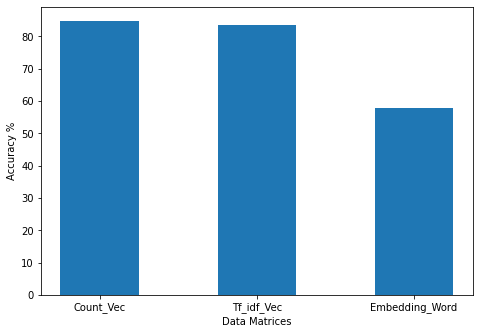

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [valid_scores_cv["adaboost"] , valid_scores_tfv["adaboost"] , valid_scores_embedding["adaboost"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

------------------------------------- Test Data -------------------------------------

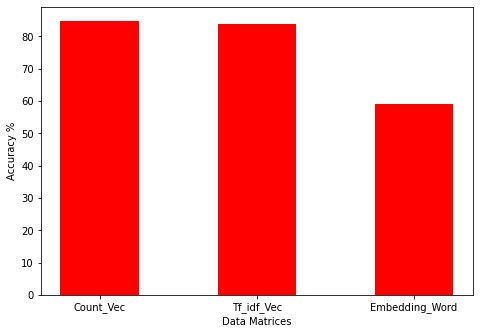

In [ ]:
data_matrices = ["Count_Vec" , "Tf_idf_Vec" , "Embedding_Word"]
accuracy = [test_scores_cv["adaboost"] , test_scores_tfv["adaboost"] , test_scores_embedding["adaboost"] ]
accuracy = [ele * 100 for ele in accuracy]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_matrices,accuracy , width = .5 , color='r')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Data Matrices')

plt.show()

# comments #

- Highest accuracy achieved was by logistic regression ( 88.7 % valid and 87.7% test ) when text was represented by TF-IDF.

- Lowest accuracy achieved was by KNN ( 51.8% valid and 51.4% test ) when text was represented by word embedding.

- In all representations, KNN achieved lower accuracy than the other classifiers.

- In all representations, logistic regression achieved higher accuracy than the other classifiers.

- TF-IDF was the best representation and achieved higher accuracy for all classifiers than CV and word embedding.

- Word embedding was the worst representation and achieved lower accuracy for all classifiers than CV and TF-IDF.